# start with importing all the data and packages needed

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
bis = pd.read_csv('us_bis.csv',low_memory=False)

# import trigger data

In [4]:
#load trigger data
conflict = pd.read_csv('IV\\ucdp_cleaned.csv')
conflict_os = pd.read_csv('IV\\ucdp_os.csv')
coup= pd.read_csv('IV\\coup_data.csv')
terror= pd.read_csv('IV\\data_gti.csv')
protest= pd.read_csv('IV\\acled_clean.csv')

# us BIS list

**descriptives**

In [5]:
data = bis.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'last_seen', 'first_seen', 'date_stamp',
       'last_change', 'new_entry', 'deletion', 'unchanged', 'month',
       'listing_count', 'listing_date', 'delisting_date', 'new_listing_count',
       'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1   Unnamed: 0  birth_date  identifiers  phones  emails  \
count   1517.000000  1517.000000         0.0          0.0     0.0     0.0   
mean     758.000000   758.000000         NaN          NaN     NaN     NaN   
std      438.064493   438.064493         NaN          NaN     NaN     NaN   
min        0.000000     0.000000         NaN          NaN     NaN     NaN   
25%      379.000000   379.000000         NaN          NaN     NaN     NaN   
50%      758.000000   758.000000         NaN          NaN     NaN     NaN   
75%     1137.000000  1137.000000  

In [6]:
data = data.sort_values(by=['month'])

In [7]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis= 'columns')
data

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,...,new_entry,deletion,unchanged,month,listing_count,listing_date,delisting_date,new_listing_count,year_id,month_id
758,us-bis-02-03-2016-qiang-hu,LegalEntity,QIANG HU,NaN,NaN,cn,"#602, NO. 39, NONG #78, SHOU GUANG ROAD, PU DO...",NaN,81 F.R. 7304 2/11/16 - 2016-02-03 - 2024-07-24,NaN,...,True,False,False,2021-08,429,20210820,NaN,1,2021,28
999,us-bis-05-21-2021-sky-blue-bird-aviation,LegalEntity,SKY BLUE BIRD AVIATION,NaN,NaN,ae,"P.O. BOX 16111, RAS AL KHAIMAH TRADE ZONE, AE",NaN,"80 F.R. 44930 7/28/15, 81 F.R. 45277 7/13/2016...",NaN,...,True,False,False,2021-08,429,20210820,NaN,1,2021,28
1000,us-bis-05-21-2021-sky-blue-bird-fzc,LegalEntity,SKY BLUE BIRD FZC,NaN,NaN,ae,"P.O. BOX 16111, RAS AL KHAIMAH TRADE ZONE, AE",NaN,"80 F.R. 44930 7/28/15, 81 F.R. 45277 7/13/2016...",NaN,...,True,False,False,2021-08,429,20210820,NaN,1,2021,28
1001,us-bis-05-21-2021-sky-blue-bird-group,LegalEntity,SKY BLUE BIRD GROUP,NaN,NaN,ae,"P.O. BOX 16111, RAS AL KHAIMAH TRADE ZONE, AE",NaN,"80 F.R. 44930 7/28/15, 81 F.R. 45277 7/13/2016...",NaN,...,True,False,False,2021-08,429,20210820,NaN,1,2021,28
1002,us-bis-05-21-2021-sky-blue-bird-ltd,LegalEntity,SKY BLUE BIRD LTD,NaN,NaN,ae,"P.O. BOX 16111, RAS AL KHAIMAH TRADE ZONE, AE",NaN,"80 F.R. 44930 7/28/15, 81 F.R. 45277 7/13/2016...",NaN,...,True,False,False,2021-08,429,20210820,NaN,1,2021,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,us-bis-12-19-2023-tina-dubner,LegalEntity,TINA DUBNER,NaN,NaN,NaN,"INMATE NUMBER: 47268-509, FMC CARSWELL FEDERAL...",NaN,2023-12-19 - 2033-02-23,NaN,...,True,True,False,2023-12,539,20231220,20231220.0,1,2023,11
1486,us-bis-12-19-2023-tina-dunbar,LegalEntity,TINA DUNBAR,NaN,NaN,NaN,"INMATE NUMBER: 47268-509, FMC CARSWELL FEDERAL...",NaN,2023-12-19 - 2033-02-23,NaN,...,True,True,False,2023-12,539,20231220,20231220.0,1,2023,11
1487,us-bis-12-19-2023-ya-when-chen,LegalEntity,YA WHEN CHEN,NaN,NaN,NaN,"INMATE NUMBER: 47268-509, FMC CARSWELL FEDERAL...",NaN,2023-12-19 - 2033-02-23,NaN,...,True,True,False,2023-12,539,20231220,20231220.0,1,2023,11
1477,us-bis-12-19-2023-donald-robert-witherow,LegalEntity,DONALD ROBERT WITHEROW,NaN,NaN,NaN,"6651 BUFFALO ROAD, 16421 CRESSON",NaN,2023-12-19 - 2025-10-13,NaN,...,True,True,False,2023-12,539,20231220,20231220.0,1,2023,11


In [8]:
print(data.listing_count.unique())

[429 697 437 645 449 442 427 417 420 428 413 436 450 451 455 468 480 484
 549 534 509 519 545 524 539]


In [9]:
#get the number of listings per month
listing_month = data.groupby('month').new_listing_count.sum()
listing_month

month
2021-08    429
2021-09    268
2021-10      2
2021-11    210
2021-12     31
2022-01     13
2022-02     14
2022-03      5
2022-04     15
2022-05     26
2022-06     17
2022-07     11
2022-08     27
2022-09     15
2022-10     15
2022-11     27
2022-12     29
2023-01     28
2023-02     33
2023-03     32
2023-04     20
2023-05     79
2023-06     41
2023-07      7
2023-08     21
2023-09     39
2023-10      4
2023-11     34
2023-12     25
Name: new_listing_count, dtype: int64

In [10]:
data['listing_month'] = data['new_listing_count'].groupby(data['month']).transform('sum')

In [11]:
print(data.listing_month.unique())

[429 268   2 210  31  13  14   5  15  26  17  11  27  29  28  33  32  20
  79  41   7  21  39   4  34  25]


Text(0.5, 1.0, 'Accumulated monthly listimgs US BIS list')

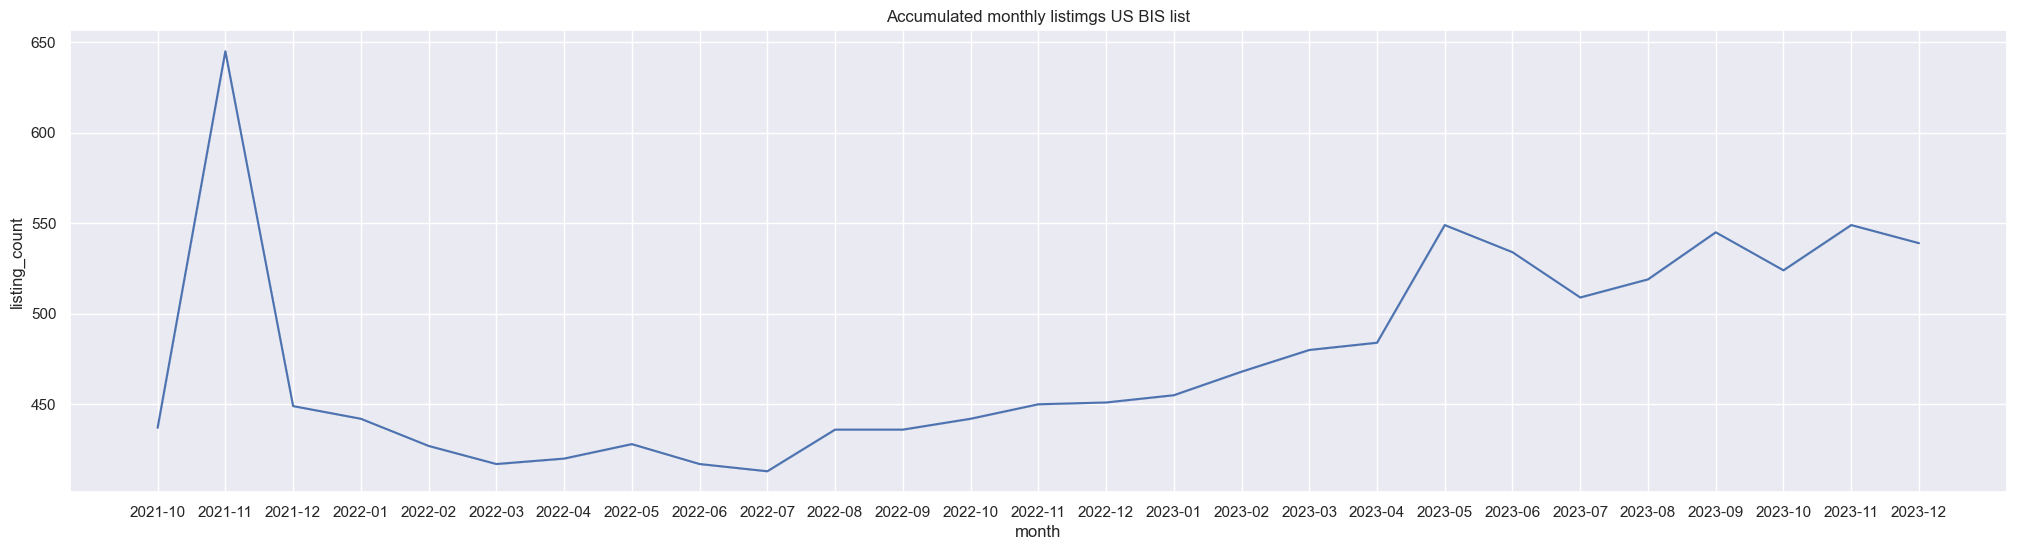

In [12]:
#get the total listings per month
data = data[data['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_bis = sns.lineplot(data=data,x='month',y='listing_count').set_title('Accumulated monthly listimgs US BIS list')
listings_bis.figure.savefig('timetrend_bis_listing')
listings_bis

Text(0.5, 1.0, 'New monthly listimgs US BIS list')

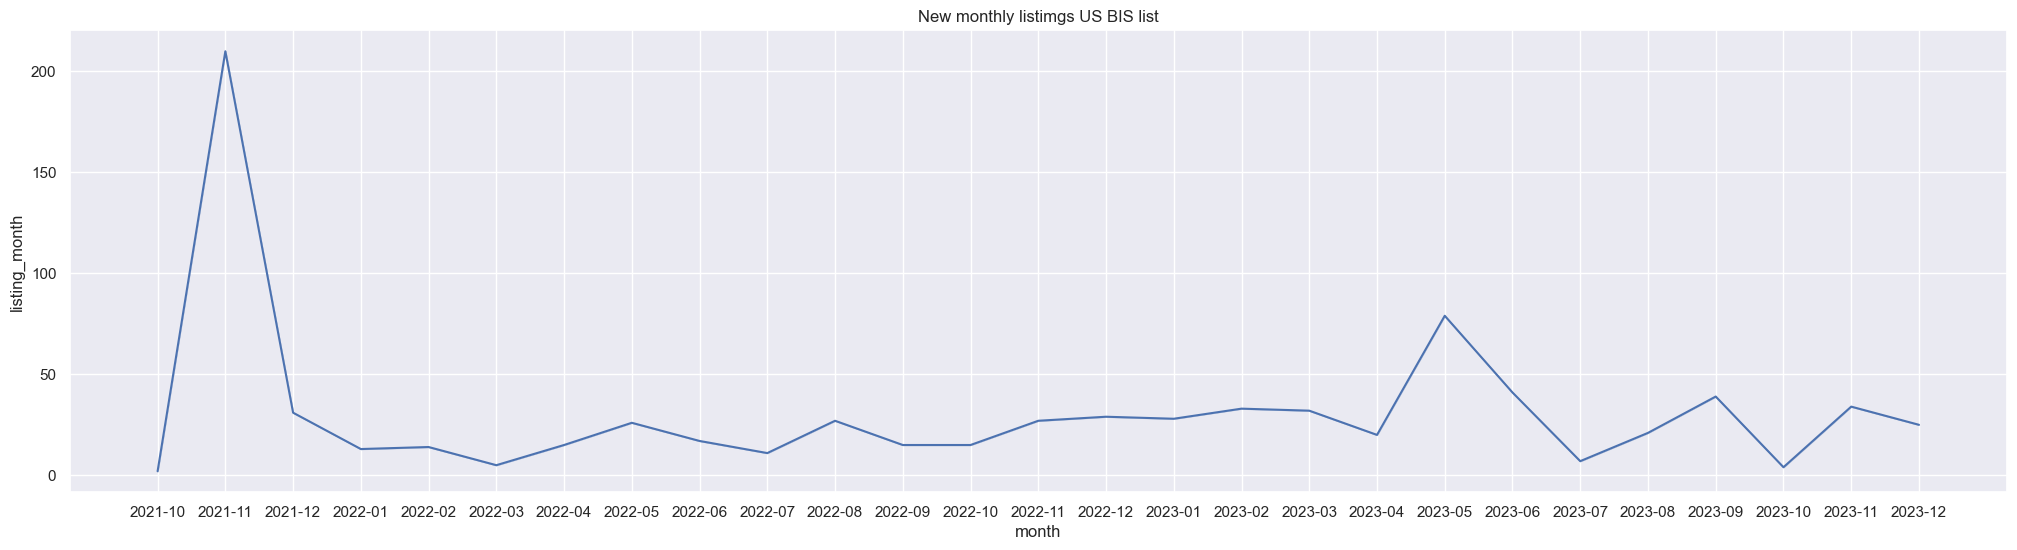

In [13]:
#get the total listings per month
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_bis = sns.lineplot(data=data,x='month',y='listing_month').set_title('New monthly listimgs US BIS list')
listings_bis.figure.savefig('timetrend_bis_newlisting')
listings_bis

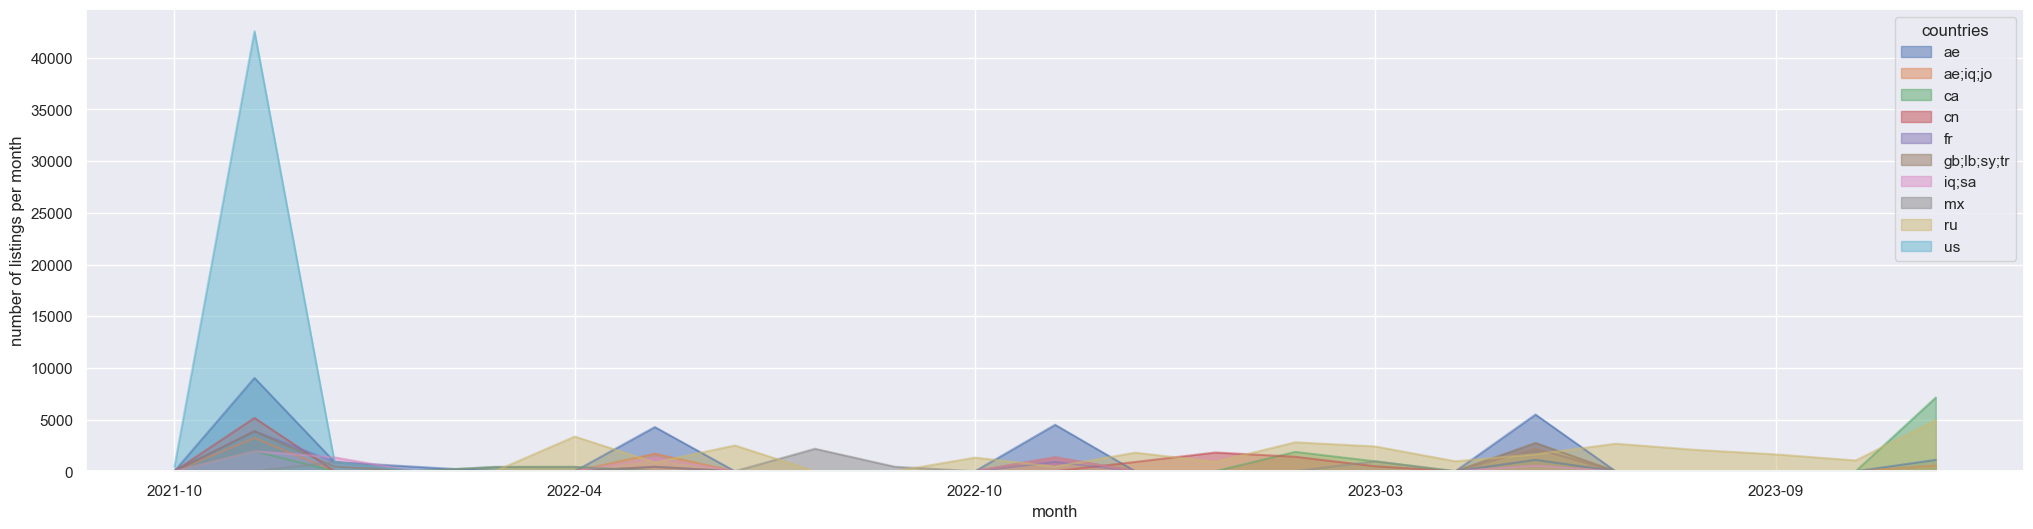

In [14]:
#time trend of the top iso codes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
grouped2 = data.groupby(['countries', 'month']).agg({'listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'listing_count': 'sum'}).nlargest(10, 'listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of listings per month')
plt.savefig('timetrend_bis_listings_unstacked.png')

# Show the plot
plt.show()

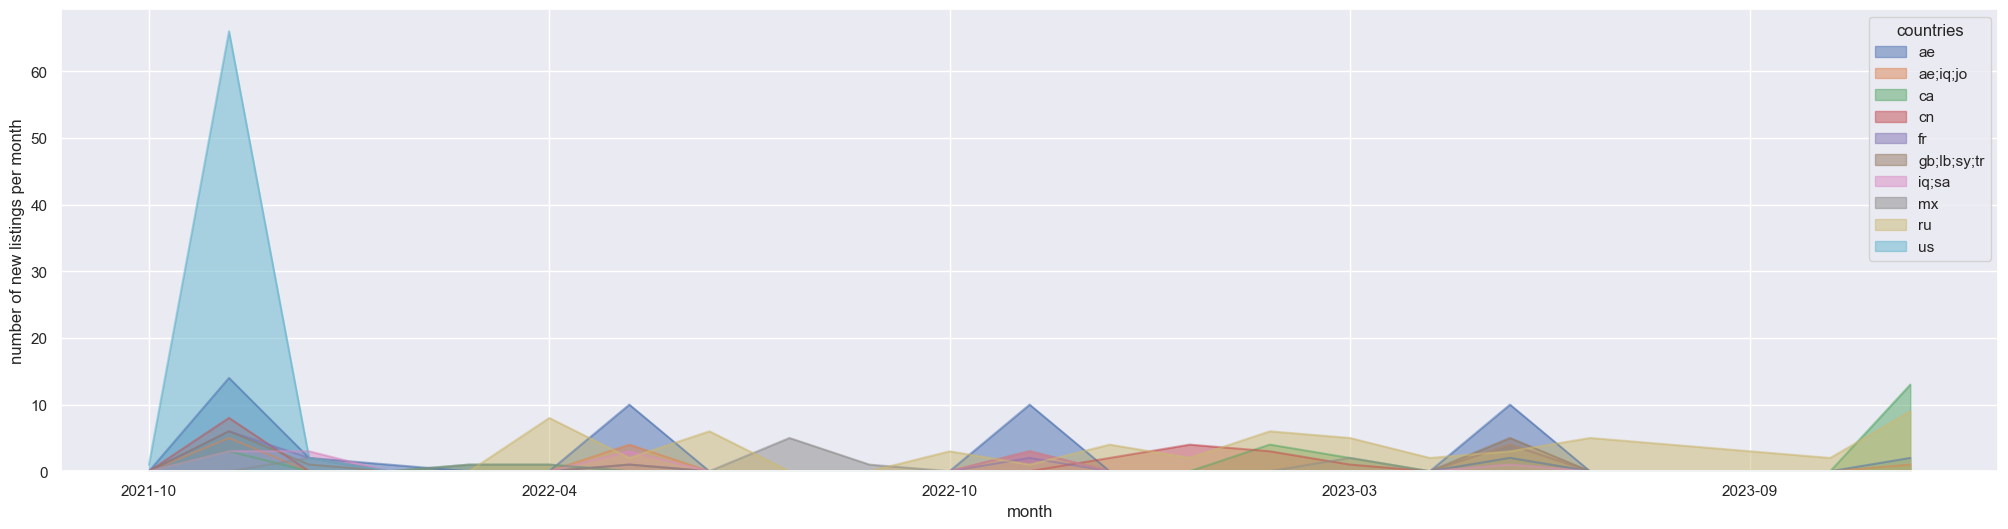

In [15]:
#time trend of the top iso codes
grouped2 = data.groupby(['countries', 'month']).agg({'new_listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'new_listing_count': 'sum'}).nlargest(10, 'new_listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='new_listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of new listings per month')
plt.savefig('timetrend_bis_new_listings_unstacked.png')

# Show the plot
plt.show()

In [16]:
#get the sates with the most new listings
data['listing_date'].value_counts().nlargest(10)

listing_date
20211102    99
20211103    52
20221108    24
20211119    23
20220514    23
20230510    19
20211201    18
20211106    13
20230614    12
20231108    12
Name: count, dtype: int64

In [17]:
#get the top shema
data['schema'].value_counts().nlargest(5)

schema
LegalEntity    820
Name: count, dtype: int64

In [18]:
#get the top sanctions regime
data['sanctions'].value_counts().nlargest(15)

sanctions
2023-11-07 - 2024-05-04                               24
2023-08-28 - 2024-02-24                               18
2023-05-16 - 2023-11-12                               10
2023-12-19 - 2033-02-23                                8
2022-06-07 - 2022-12-04                                7
2022-06-24 - 2022-12-21                                6
2022-08-29 - 2023-02-23                                6
88 F.R. 77955 11/14/2023 - 2023-11-07 - 2024-05-04     6
2022-04-07 - 2022-10-04                                6
2023-02-24 - 2023-08-23                                6
84 F.R. 40025 8/13/2019 - 2019-08-05 - 2028-10-10      5
2022-12-13 - 2023-06-13                                5
82 F.R. 46480 10/5/2017 - 2017-09-28 - 2025-11-19      5
87 F.R. 77067 12/16/2022 - 2023-06-08 - 2023-12-05     5
2023-03-23 - 2030-08-03                                4
Name: count, dtype: int64

# add trigger events

In [19]:
conflict.describe
# get a month id
conflict['month'] = pd.to_datetime(conflict['conflict_event']).dt.to_period('M')
conflict_os['month'] = pd.to_datetime(conflict_os['conflict_event']).dt.to_period('M')

In [20]:
print(conflict.columns)
conflict = conflict.sort_values(by=['month'])
print(conflict)
print(conflict_os.columns)
conflict_os = conflict_os.sort_values(by=['month'])
print(conflict_os)
print(protest.columns)
protest = protest.sort_values(by=['month'])
print(protest)

Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
      Unnamed: 0      id                 relid  year  type_of_violence  \
1507       85255  327584    DRC-2020-2-15650-0  2020               2.0   
1872       85722  325549    DRC-2020-3-16065-4  2020               3.0   
1873       85723  327127    DRC-2020-3-16065-5  2020               3.0   
1542       85310  325162    DRC-2020-2-15892-0  2020               2.0   
997        83689  377179   DRC-2020-1-10509-21  2020               1.0   
...          ...     ...                   ...   ...               ...   
957        83165  460439    DRC-2022-3-2434-27  2022               3.0   
956        83164  460230    DRC-2022-3-2434-26  2022               3.0   
894        81915  460094    AFG-2022-3-973-669  2022               3.0   
2798       86694  460325    DRC-2022-2-17417-5  2022    

**now plot the association**

In [21]:
#transfrom month to string
conflict['month'] = conflict['month'].astype(str)
#conflict['month'] = pd.to_datetime(conflict['month'])
conflict.month.dtypes

conflict_os['month'] = conflict_os['month'].astype(str)
conflict_os.month.dtypes

protest['month'] = protest['month'].astype(str)
protest.month.dtypes

dtype('O')

In [22]:
#get the new listings per month toether with conflict fatalities and protest events
# combined plot
grouped_1 = data.groupby(['month']).agg({'new_listing_count': 'sum'})
grouped_2 = conflict.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_3 = conflict_os.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_4 = protest.groupby(['month']).agg({'event_count': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
grouped_3 = grouped_3.reset_index()
grouped_4 = grouped_4.reset_index()

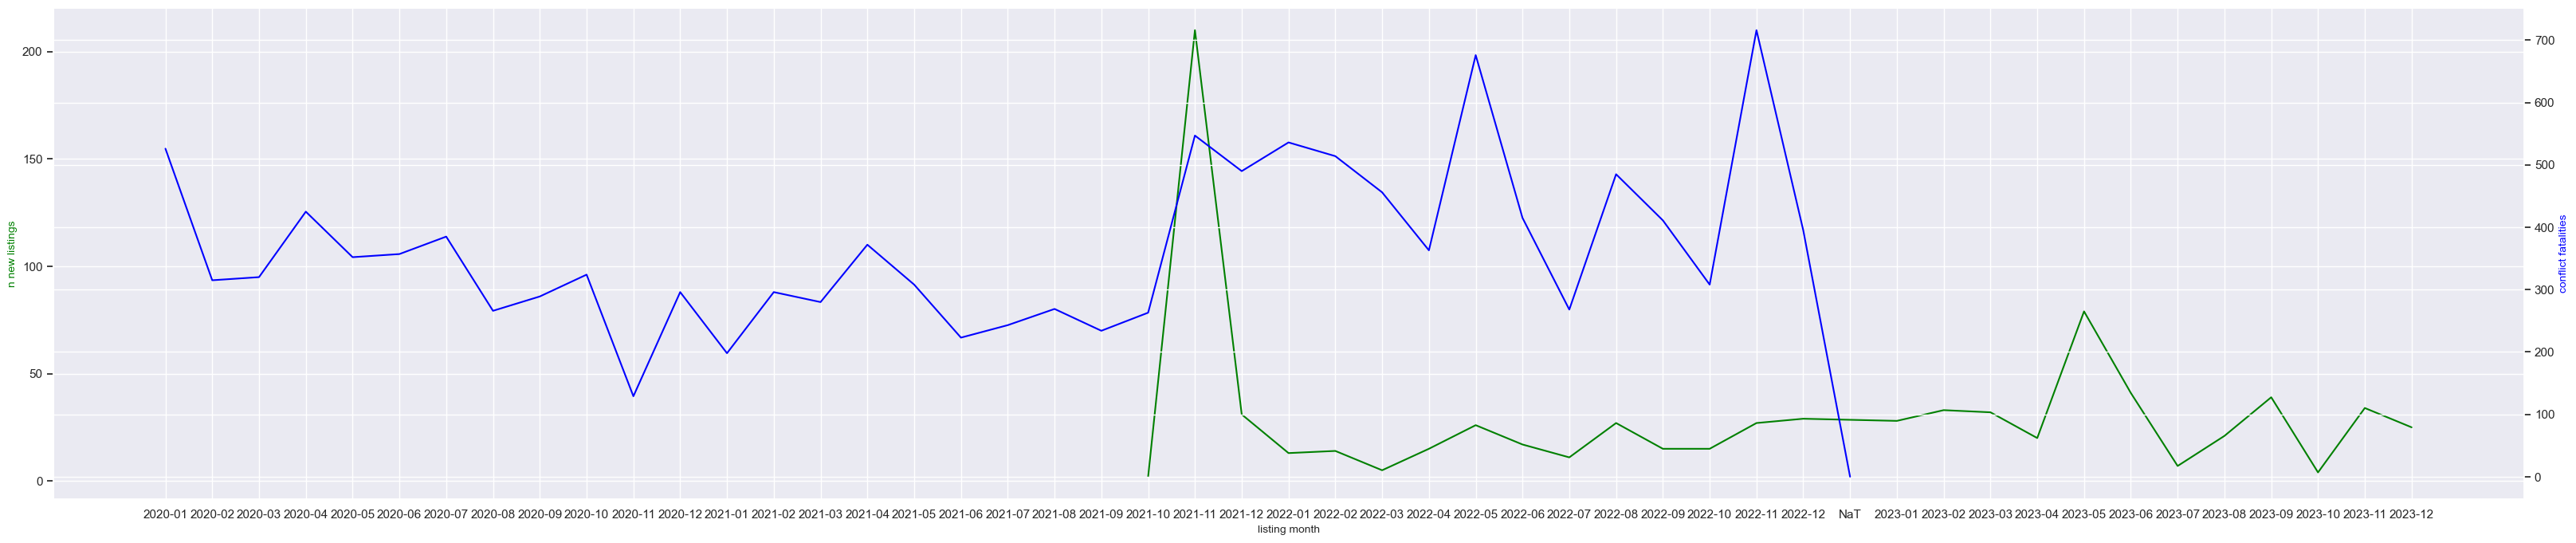

In [23]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.month, grouped_2["fatality_best_estimate"],color="blue")
ax2.set_ylabel("conflict fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_bis_combined_conflict.png')
plt.show()

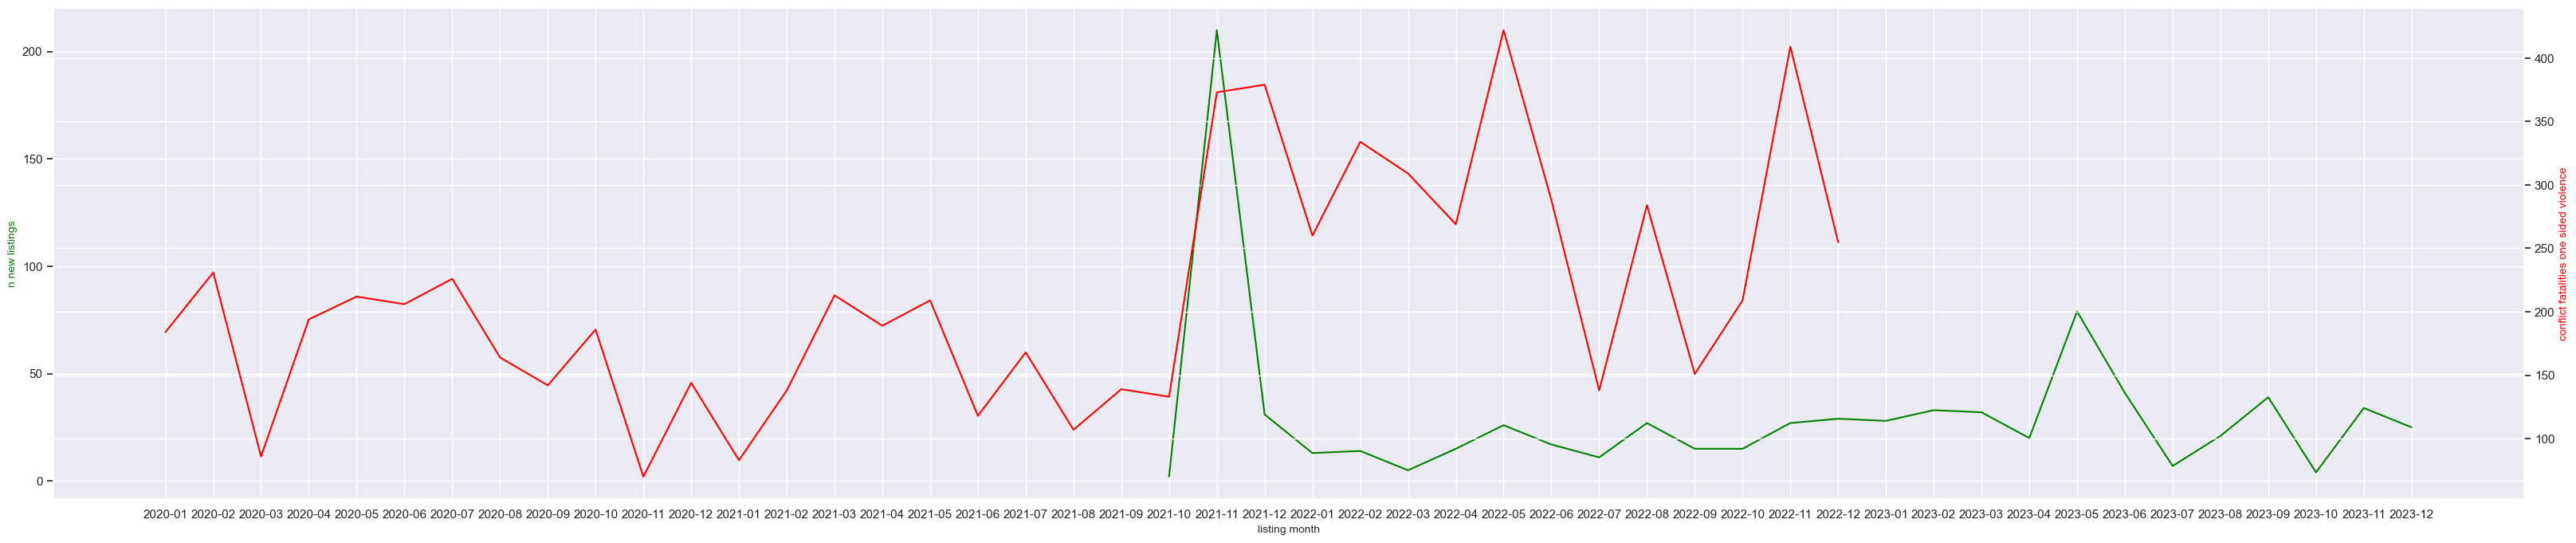

In [24]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax3.plot(grouped_3.month, grouped_3["fatality_best_estimate"],color="red")
ax3.set_ylabel("conflict fatalities one sided violence",color="red",fontsize=10)
plt.savefig('timetrend_bis_combined_conflict_os.png')

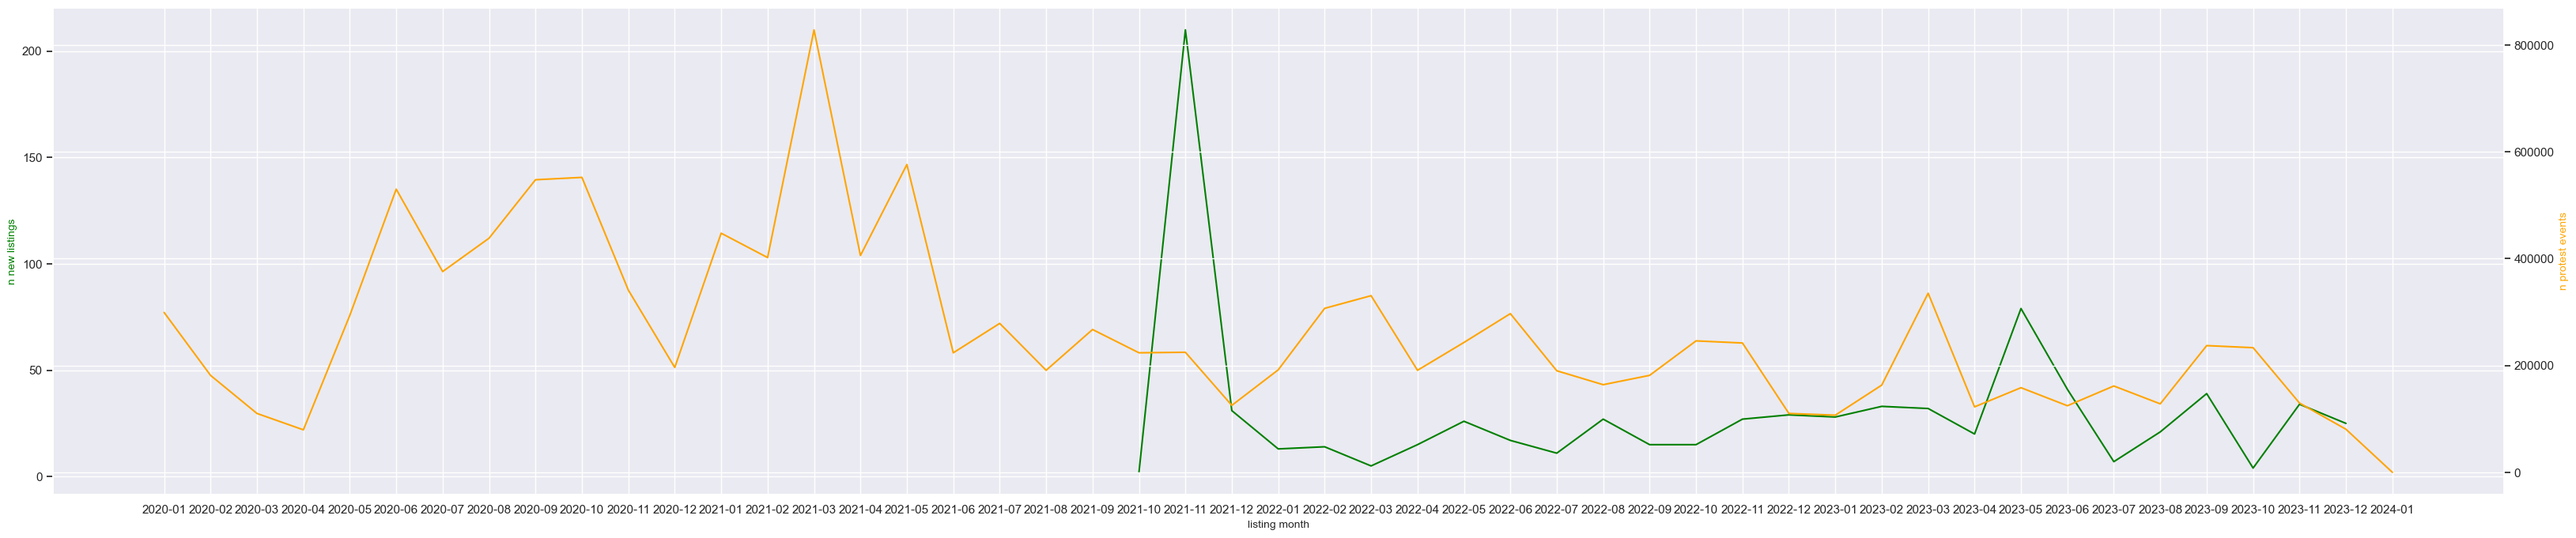

In [25]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax4=ax.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(grouped_4.month, grouped_4["event_count"],color="orange")
ax4.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_bis_combined_protest.png')

**start analysis**

In [26]:
#filter the listings
data = data.copy()
data = data[data['month'] < '2023-01']
data.month.unique()
#filter the trigger events
conflict = conflict.copy()
conflict = conflict[conflict['month'] > '2021-09']
print(conflict.month.unique())

conflict_os = conflict_os.copy()
conflict_os = conflict_os[conflict_os['month'] > '2021-09']
print(conflict_os.month.unique())

protest = protest.copy()
protest = protest[protest['month'] > '2021-09']
protest = protest[protest['month'] < '2023-01']
print(protest.month.unique())

['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' 'NaT']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']


In [27]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
print('conflict')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#one-sided violence
print('one-sided violence')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#protest events
print('Protest')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

conflict
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: nan
P-value (ANOVA): nan
one-sided violence
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 1144.144575160139
P-value (ANOVA): 6.547877378287596e-184
Protest
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 12574.10462509757
P-value (ANOVA): 0.0
